In [1]:
# Fix figure.dpi
%matplotlib inline
# Display exactly the figure that will be saved
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.dpi']

100.0

### Scales check

https://github.com/rougier/scientific-visualization-book/blob/master/code/scales-projections/scales-check.py

Linear scale
 -> distance(  0.1,  1.0) = 4.19
 -> distance(  1.0, 10.0) = 41.85
 -> distance( 10.0,100.0) = 418.50

Log scale
 -> distance(  0.1,  1.0) = 155.00
 -> distance(  1.0, 10.0) = 155.00
 -> distance( 10.0,100.0) = 155.00


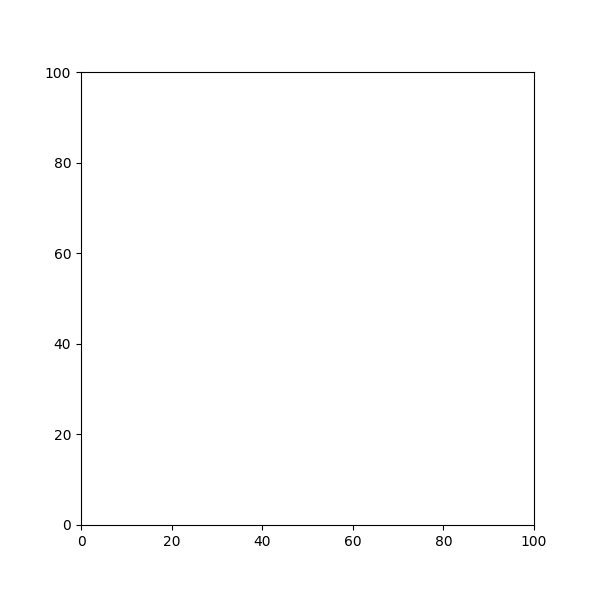

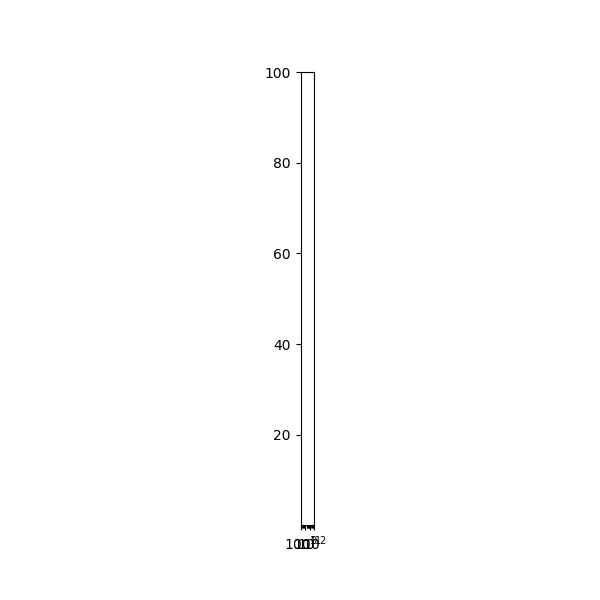

In [3]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, SymmetricalLogLocator


fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1, aspect=1, xlim=[0, 100], ylim=[0, 100])
P0, P1, P2, P3 = (0.1, 0.1), (1, 1), (10, 10), (100, 100)
transform = ax.transData.transform
print("Linear scale")
print(
    " -> distance({0:5.1f},{1:5.1f}) = {2:.2f}".format(
        P0[0], P1[0], abs((transform(P1) - transform(P0))[0])
    )
)
print(
    " -> distance({0:5.1f},{1:5.1f}) = {2:.2f}".format(
        P1[0], P2[0], abs((transform(P2) - transform(P1))[0])
    )
)
print(
    " -> distance({0:5.1f},{1:5.1f}) = {2:.2f}".format(
        P2[0], P3[0], abs((transform(P3) - transform(P2))[0])
    )
)
print()

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1, aspect=1, xlim=[0.1, 100], ylim=[0.1, 100])
ax.set_xscale("log")
transform = ax.transData.transform

P0, P1, P2, P3 = (0.1, 0.1), (1, 1), (10, 10), (100, 100)
print("Log scale")
print(
    " -> distance({0:5.1f},{1:5.1f}) = {2:.2f}".format(
        P0[0], P1[0], abs((transform(P1) - transform(P0))[0])
    )
)
print(
    " -> distance({0:5.1f},{1:5.1f}) = {2:.2f}".format(
        P1[0], P2[0], abs((transform(P2) - transform(P1))[0])
    )
)
print(
    " -> distance({0:5.1f},{1:5.1f}) = {2:.2f}".format(
        P2[0], P3[0], abs((transform(P3) - transform(P2))[0])
    )
)

### Figure 3.1 - Comparison of the linear, log and logit scales

https://github.com/rougier/scientific-visualization-book/blob/master/code/scales-projections/scales-comparison.py

**Install Roboto for Ubuntu 20.04**

- Stop Jupyter Lab
- Install font
```bash
sudo apt-get install fonts-roboto
```
- Remove matplotlib cache
```bash
rm -rf ~/.cache/matplotlib
```
- Start Jupyter Lab

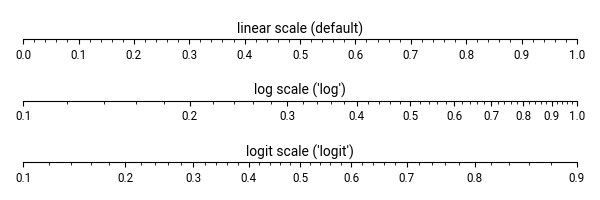

In [4]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Style
# -----------------------------------------------------------------------------
plt.rc("font", family="Roboto")
plt.rc("xtick", labelsize="small")
plt.rc("ytick", labelsize="small")
plt.rc("axes", labelsize="medium", titlesize="medium")


fig = plt.figure(figsize=(6, 2))

# Linear axis
# -----------------------------------------------------------------------------
ax = plt.subplot(3, 1, 1, xlim=[0, 1], ylim=[0, 1])
ax.patch.set_facecolor("none")
ax.text(
    0.5,
    0.1,
    "linear scale (default)",
    transform=ax.transAxes,
    horizontalalignment="center",
    verticalalignment="bottom",
)
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.tick_params(axis="both", which="major")


# Log axis
# -----------------------------------------------------------------------------
ax = plt.subplot(3, 1, 2, xlim=[0.1, 1.0], ylim=[0, 1])
ax.patch.set_facecolor("none")
ax.text(
    0.5,
    0.1,
    "log scale ('log')",
    transform=ax.transAxes,
    horizontalalignment="center",
    verticalalignment="bottom",
)
ax.set_xscale("log")
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.xaxis.set_minor_formatter(plt.NullFormatter())

# Logit axis
# -----------------------------------------------------------------------------
ax = plt.subplot(3, 1, 3, xlim=[0.1, 0.9], ylim=[0, 1])
ax.patch.set_facecolor("none")
ax.text(
    0.5,
    0.1,
    "logit scale ('logit')",
    transform=ax.transAxes,
    horizontalalignment="center",
    verticalalignment="bottom",
)
ax.set_xscale("logit")
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.xaxis.set_minor_formatter(plt.NullFormatter())

# Show
# -----------------------------------------------------------------------------
plt.tight_layout()
plt.savefig("../../figures/03-scales-projections/scales-comparison.pdf")
plt.show()

### Figure 3.2 - Custom (user defined) scales

https://github.com/rougier/scientific-visualization-book/blob/master/code/scales-projections/scales-custom.py

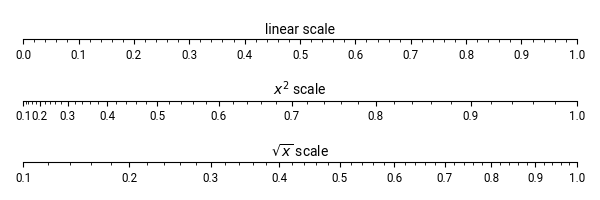

In [5]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Style
# -----------------------------------------------------------------------------
plt.rc("font", family="Roboto")
plt.rc("xtick", labelsize="small")
plt.rc("ytick", labelsize="small")
plt.rc("axes", labelsize="medium", titlesize="medium")


fig = plt.figure(figsize=(6, 2))

# Linear axis
# -----------------------------------------------------------------------------
ax = plt.subplot(3, 1, 1, xlim=[0.0, 1.0], ylim=[0, 1])
ax.patch.set_facecolor("none")
ax.text(
    0.5,
    0.1,
    "linear scale",
    transform=ax.transAxes,
    horizontalalignment="center",
    verticalalignment="bottom",
)
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.tick_params(axis="both", which="major")


def forward(x):
    return x ** 2


def inverse(x):
    return x ** (1 / 2)


# x**2 scale
# -----------------------------------------------------------------------------
ax = plt.subplot(3, 1, 2, xlim=[0.1, 1.0], ylim=[0, 1])
ax.patch.set_facecolor("none")
ax.text(
    0.5,
    0.1,
    "$x^2$ scale",
    transform=ax.transAxes,
    horizontalalignment="center",
    verticalalignment="bottom",
)
ax.set_xscale("function", functions=(forward, inverse))
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.xaxis.set_minor_formatter(plt.NullFormatter())

# sqrt(x)
# -----------------------------------------------------------------------------
ax = plt.subplot(3, 1, 3, xlim=[0.1, 1.0], ylim=[0, 1])
ax.patch.set_facecolor("none")
ax.text(
    0.5,
    0.1,
    "$\sqrt{x}$ scale",
    transform=ax.transAxes,
    horizontalalignment="center",
    verticalalignment="bottom",
)
ax.set_xscale("function", functions=(inverse, forward))
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.xaxis.set_minor_formatter(plt.NullFormatter())

# Show
# -----------------------------------------------------------------------------
plt.tight_layout()
plt.savefig("../../figures/03-scales-projections/scales-custom.pdf")
plt.show()

### Figure 3.3 - Polar projection

https://github.com/rougier/scientific-visualization-book/blob/master/code/scales-projections/projection-polar-config.py

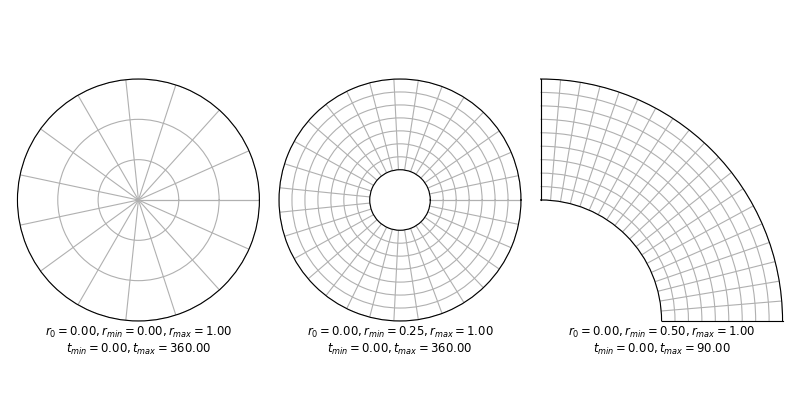

In [11]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt


def polar(ax, r0, rmin, rmax, rticks, tmin, tmax, tticks):
    ax.set_yticks(np.linspace(rmin, rmax, rticks))
    ax.set_yticklabels([])
    ax.set_rorigin(r0)
    ax.set_rmin(rmin)
    ax.set_rmax(rmax)

    ax.set_xticks(np.linspace(np.pi * tmin / 180, np.pi * tmax / 180, tticks))
    ax.set_xticklabels([])
    ax.set_thetamin(tmin)
    ax.set_thetamax(tmax)

    text = r"""$r_{0}=%.2f,r_{min}=%.2f,r_{max}=%.2f$""" % (r0, rmin, rmax)
    text += "\n"
    text += r"""$t_{min}=%.2f,t_{max}=%.2f$""" % (tmin, tmax)

    plt.text(
        0.5, -0.15, text, size="small", ha="center", va="bottom", transform=ax.transAxes
    )


fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1, 3, 1, aspect=1, projection="polar")
polar(ax, 0.00, 0.00, 1.00, 4, 0, 360, 16)

ax = fig.add_subplot(1, 3, 2, aspect=1, projection="polar")
polar(ax, 0.00, 0.25, 1.00, 8, 0, 360, 32)

ax = fig.add_subplot(1, 3, 3, aspect=1, projection="polar")
polar(ax, 0.00, 0.50, 1.00, 10, 0, 90, 20)

plt.tight_layout()
plt.savefig("../../figures/03-scales-projections/projection-polar-config.pdf", dpi=600)
plt.show()

### Figure 3.3 - Polar projection

https://github.com/rougier/scientific-visualization-book/blob/master/code/scales-projections/projection-polar-histogram.py

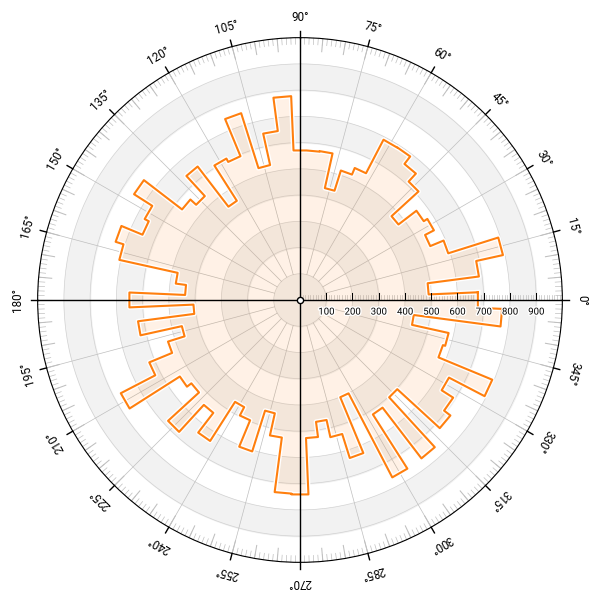

In [12]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Setup
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1, projection="polar", frameon=True)
ax.set_thetalim(0, 2 * np.pi)
ax.set_rlim(0, 1000)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks(np.linspace(100, 1000, 10))
ax.set_yticklabels([])
ax.tick_params("both", grid_alpha=0.50, grid_zorder=-10, grid_linewidth=0.5)


# Theta ticks
radius = ax.get_rmax()
length = 0.025 * radius
for i in range(360):
    angle = np.pi * i / 180
    plt.plot(
        [angle, angle],
        [radius, radius - length],
        linewidth=0.50,
        color="0.75",
        clip_on=False,
    )
for i in range(0, 360, 5):
    angle = np.pi * i / 180
    plt.plot(
        [angle, angle],
        [radius, radius - 2 * length],
        linewidth=0.75,
        color="0.75",
        clip_on=False,
    )
for i in range(0, 360, 15):
    angle = np.pi * i / 180
    plt.plot([angle, angle], [radius, 100], linewidth=0.5, color="0.75")
    plt.plot(
        [angle, angle],
        [radius + length, radius],
        zorder=500,
        linewidth=1.0,
        color="0.00",
        clip_on=False,
    )
    plt.text(
        angle,
        radius + 4 * length,
        "%d°" % i,
        zorder=500,
        rotation=i - 90,
        rotation_mode="anchor",
        va="top",
        ha="center",
        size="small",
        family="Roboto",
        color="black",
    )
for i in range(0, 360, 90):
    angle = np.pi * i / 180
    plt.plot([angle, angle], [radius, 0], zorder=500, linewidth=1.00, color="0.0")


# Radius ticks
def polar_to_cartesian(theta, radius):
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.array([x, y])


def cartesian_to_polar(x, y):
    radius = np.sqrt(x ** 2 + y ** 2)
    theta = np.arctan2(y, x)
    return np.array([theta, radius])


for i in range(0, 1000, 10):
    P0 = 0, i
    P1 = cartesian_to_polar(*(polar_to_cartesian(*P0) + [0, 0.75 * length]))
    plt.plot([P0[0], P1[0]], [P0[1], P1[1]], linewidth=0.50, color="0.75")

for i in range(100, 1000, 100):
    P0 = 0, i
    P1 = cartesian_to_polar(*(polar_to_cartesian(*P0) + [0, +1.0 * length]))
    plt.plot([P0[0], P1[0]], [P0[1], P1[1]], zorder=500, linewidth=0.75, color="0.0")
    P1 = cartesian_to_polar(*(polar_to_cartesian(*P0) + [0, -1.0 * length]))
    text = ax.text(
        P1[0],
        P1[1],
        "%d" % i,
        zorder=500,
        va="top",
        ha="center",
        size="x-small",
        family="Roboto",
        color="black",
    )
    text.set_path_effects(
        [path_effects.Stroke(linewidth=2, foreground="white"), path_effects.Normal()]
    )

# Circular bands
n = 1000
T = np.linspace(0, 2 * np.pi, n)
color = "0.95"
ax.fill_between(T, 0, 100, color=color, zorder=-50)
ax.fill_between(T, 200, 300, color=color, zorder=-50)
ax.fill_between(T, 400, 500, color=color, zorder=-50)
ax.fill_between(T, 600, 700, color=color, zorder=-50)
ax.fill_between(T, 800, 900, color=color, zorder=-50)
plt.scatter([0], [0], 20, facecolor="white", edgecolor="black", zorder=1000)


# Actual plot
np.random.seed(123)
n = 145
T = 2 * np.pi / n + np.linspace(0, 2 * np.pi, n)
T[1::2] = T[0:-1:2]
R = np.random.uniform(400, 800, n)
R[-1] = R[0]
R[1:-1:2] = R[2::2]
ax.fill(T, R, color="C1", zorder=150, alpha=0.1)
ax.plot(T, R, color="white", zorder=200, linewidth=3.5)
ax.plot(T, R, color="C1", zorder=250, linewidth=1.5)


plt.tight_layout()
plt.savefig("../../figures/03-scales-projections/projection-polar-histogram.pdf")
plt.show()